In [1]:
import os
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# read data
bas_dir=os.path.dirname('/Users/yunyao_1/Documents/Experiments_Data/data/CdSe_DNP/Yunyao')
path1_list = ['Yunyao','241','pdata','1']
data_path1 = os.path.join(bas_dir, *path1_list)
path2_list = ['Yunyao','242','pdata','1']
data_path2 = os.path.join(bas_dir, *path2_list)
path3_list = ['Yunyao','223','pdata','1']
data_path3 = os.path.join(bas_dir, *path3_list)
path4_list = ['Yunyao','230','pdata','1']
data_path4 = os.path.join(bas_dir, *path4_list)
#print(data_path)

In [3]:
dic, data1=ng.bruker.read_pdata(data_path1)
dic, data2=ng.bruker.read_pdata(data_path2)
dic, data3=ng.bruker.read_pdata(data_path3)
dic, data4=ng.bruker.read_pdata(data_path4)
udic=ng.bruker.guess_udic(dic,data1)
uc=ng.fileiobase.uc_from_udic(udic)
ppm=uc.ppm_scale()

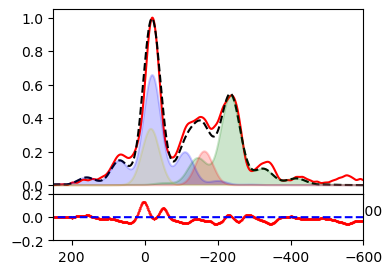

In [13]:
from matplotlib import gridspec
# use simulated simpson files to reconstruct the experimental spectrum
df1=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test81.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df2=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test82.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df3=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test83.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df4=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test84.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')

df1.real=df1.real-df1.real.min()  #baseline correction
df1.real=df1.real/df1.real.max()  #normalization

df2.real=df2.real-df2.real.min()  #baseline correction
df2.real=df2.real/df2.real.max()  #normalization

df3.real=df3.real-df3.real.min()  #baseline correction
df3.real=df3.real/df3.real.max()  #normalization

df4.real=df4.real-df4.real.min()  #baseline correction
df4.real=df4.real/df4.real.max()  #normalization


#8kmas data
data3=data3/data3.max() #normalized experimental data

#scale peaks  to generate the  syntehized spectrum
scale=np.array([46293.6,29068.3,56883.7,17460.2])
scale=scale/max(scale)
#rescale it so that it matches expeirmental value
scale=scale/scale[0]*data3[uc(-236.019,'ppm')]

SW =125000
ref_ppm = -193.76087992447444
NP=2048
nuclus_freq= udic[0]['obs']
span_ppm = SW/nuclus_freq
start_x= ref_ppm-span_ppm/2
end_x= ref_ppm + span_ppm/2

syn_spec=np.array(df4.real*scale[3]+df1.real*scale[0]+df3.real*scale[2]+df2.real*scale[1]) # combine all components
diff = syn_spec-np.array(data3[::-1])
x_axis =np.linspace(start_x, end_x, num= NP, endpoint=True)
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.25] )
ax1 = fig.add_subplot(gs[0])
ax2  =fig.add_subplot(gs[1])
gs.update(hspace=0)
ax1.plot(ppm, data3, "r-")
ax1.plot(x_axis, syn_spec, 'k--')

ax2.plot(x_axis,diff, 'ro', markersize=0.4 )
ax2.plot(x_axis,np.zeros_like(x_axis), 'b--')

# peak 1
ax1.plot(x_axis,df1.real*scale[0], "g",alpha=0.2)
ax1.fill_between(x_axis, (df1.real*scale[0]).min(), df1.real*scale[0], facecolor="green", alpha=0.2)

# peak core
ax1.plot(x_axis,df2.real*scale[1], "y",alpha=0.2)
ax1.fill_between(x_axis, (df2.real*scale[1]).min(), df2.real*scale[1], facecolor="yellow", alpha=0.2)

# peak 3
ax1.plot(x_axis,df3.real*scale[2], "b",alpha=0.2)
ax1.fill_between(x_axis, (df3.real*scale[2]).min(), df3.real*scale[2], facecolor="blue", alpha=0.2)

# peak 4
ax1.plot(x_axis,df4.real*scale[3], "r",alpha=0.2)
ax1.fill_between(x_axis, (df4.real*scale[3]).min(), df4.real*scale[3], facecolor="red", alpha=0.2)

ax1.set_xlim([250,-600])
ax2.set_xlim([250,-600])
ax2.set_ylim([-0.2,0.2])

fig.savefig('QD408_HCdCP_8KMASP_fitting.pdf')


In [ ]:
# #expoort data to excel
# data_dict = {'ppm': x_axis,'exp':data3, 'syn_spec': syn_spec, 'green':df1.real, 'yellow':df2.real, 'blue': df3.real, 'red':df4.real, 'diff': diff}
# df = pd.DataFrame(data_dict)
# df.to_excel('QD408_HCdCP_8KMASP_fitting.xlsx', index=False)

In [8]:
#calculate the residue spectrum and rms
import numpy as np

def calculate_rms(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Input arrays must have the same shape")
    
    squared_diff = (array1 - array2)**2
    mean_squared_diff = np.mean(squared_diff)
    rms = np.sqrt(mean_squared_diff)
    return rms

# Example usage
array1=syn_spec
array2 = np.array(data3[::-1])

rms_value = calculate_rms(array1, array2)
print(f"Root Mean Square (RMS): {rms_value:.2f}")


Root Mean Square (RMS): 0.03


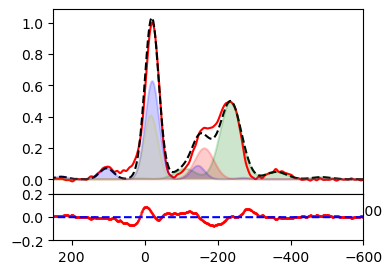

In [7]:
from matplotlib import gridspec
# use simulated simpson files to reconstruct the experimental spectrum
df1=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test111.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df2=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test112.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df3=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test113.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df4=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test114.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')

df1.real=df1.real-df1.real.min()  #baseline correction
df1.real=df1.real/df1.real.max()  #normalization

df2.real=df2.real-df2.real.min()  #baseline correction
df2.real=df2.real/df2.real.max()  #normalization

df3.real=df3.real-df3.real.min()  #baseline correction
df3.real=df3.real/df3.real.max()  #normalization

df4.real=df4.real-df4.real.min()  #baseline correction
df4.real=df4.real/df4.real.max()  #normalization

data4=data4/data4.max() #normalized experimental data

scale=np.array([29774.4,24550.6,37772.5,11927.4]) # sacle synthesize spectrum based on their absolute intensities
scale=scale/max(scale)
scale=scale/scale[0]*data4[uc(-236.019,'ppm')] # rescale synthesize spectrum so that it matches experiemntal one


SW =125000
ref_ppm = -193.76087992447444
NP=2048
nuclus_freq= udic[0]['obs']
span_ppm = SW/nuclus_freq
start_x= ref_ppm-span_ppm/2
end_x= ref_ppm + span_ppm/2

syn_spec=np.array(df4.real*scale[3]+df1.real*scale[0]+df3.real*scale[2]+df2.real*scale[1]) # combine all components

diff = syn_spec-np.array(data4[::-1])

x_axis =np.linspace(start_x, end_x, num= NP, endpoint=True)

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.25] )
ax1 = fig.add_subplot(gs[0])
ax2  =fig.add_subplot(gs[1])
gs.update(hspace=0)

ax1.plot(ppm, data4, "r-")
ax1.plot(x_axis, syn_spec, 'k--')

ax2.plot(x_axis,diff, 'ro', markersize=0.4 )
ax2.plot(x_axis,np.zeros_like(x_axis), 'b--')

# peak 1
ax1.plot(x_axis,df1.real*scale[0], "g",alpha=0.2)
ax1.fill_between(x_axis, (df1.real*scale[0]).min(), df1.real*scale[0], facecolor="green", alpha=0.2)

# peak core
ax1.plot(x_axis,df2.real*scale[1], "y",alpha=0.2)
ax1.fill_between(x_axis, (df2.real*scale[1]).min(), df2.real*scale[1], facecolor="yellow", alpha=0.2)

# peak 3
ax1.plot(x_axis,df3.real*scale[2], "b",alpha=0.2)
ax1.fill_between(x_axis, (df3.real*scale[2]).min(), df3.real*scale[2], facecolor="blue", alpha=0.2)

# peak 4
ax1.plot(x_axis,df4.real*scale[3], "r",alpha=0.2)
ax1.fill_between(x_axis, (df4.real*scale[3]).min(), df4.real*scale[3], facecolor="red", alpha=0.2)

ax1.set_xlim([250,-600])
ax2.set_xlim([250,-600])
ax2.set_ylim([-0.2,0.2])

fig.savefig('QD408_HCdCP_11KMASP_fitting.pdf')

In [ ]:
# data_dict = {'ppm': x_axis, 'exp': data4, 'syn_spec': syn_spec, 'green':df1.real, 'yellow':df2.real, 'blue': df3.real, 'red':df4.real, 'diff': diff}
# df = pd.DataFrame(data_dict)
# df.to_excel('QD408_HCdCP_11KMASP_fitting.xlsx', index=False)

In [68]:
#calculate the residue spectrum and rms
import numpy as np

def calculate_rms(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Input arrays must have the same shape")
    
    squared_diff = (array1 - array2)**2
    mean_squared_diff = np.mean(squared_diff)
    rms = np.sqrt(mean_squared_diff)
    return rms

# Example usage
array1 = syn_spec
array2 = np.array(data4[::-1])

rms_value = calculate_rms(array1, array2)
print(f"Root Mean Square (RMS): {rms_value:.2f}")

Root Mean Square (RMS): 0.02


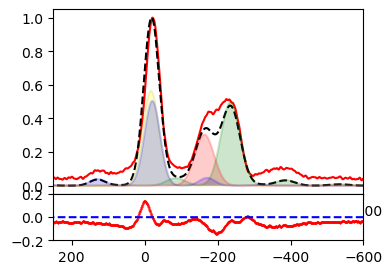

In [9]:
from matplotlib import gridspec
# use simulated simpson files to reconstruct the experimental spectrum
df1=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test131.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df2=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test132.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df3=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test133.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df4=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test134.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')

df1.real=df1.real-df1.real.min()  #baseline correction
df1.real=df1.real/df1.real.max()  #normalization

df2.real=df2.real-df2.real.min()  #baseline correction
df2.real=df2.real/df2.real.max()  #normalization

df3.real=df3.real-df3.real.min()  #baseline correction
df3.real=df3.real/df3.real.max()  #normalization

df4.real=df4.real-df4.real.min()  #baseline correction
df4.real=df4.real/df4.real.max()  #normalization

# combine df2 and df3 in a ratio from fitting results, then normalize
# peak_core=df2.real+df3.read8(58811.8/27536.8)
# peak_core=peak_core/peak_core.max()
#ratio=58811.8/(27536.8+58811.8)

#8kmas data
data1=(data1-data1.min())
data1=data1/data1.max() #normalized experimental data

#scale=[data3[uc(-236,'ppm')],data3[uc(-21.7,'ppm')]*(1-ratio), data3[uc(-21.7,'ppm')]*ratio,data3[uc(-165.8,'ppm')]]
#-236.019	-18.197	-21.975	-164.348
#scale=np.array([4731.3,2622.3,14273.6,3831.1])
scale=np.array([24769.9,27937.5,24993.9,15092.6])

scale=scale/max(scale)
scale=scale/scale[0]*data1[uc(-236.019,'ppm')]


SW =125000
ref_ppm = -193.76087992447444
NP=2048
nuclus_freq= udic[0]['obs']
span_ppm = SW/nuclus_freq
start_x= ref_ppm-span_ppm/2
end_x= ref_ppm + span_ppm/2

#synthesize t


syn_spec=np.array(df4.real*scale[3]+df1.real*scale[0]+df3.real*scale[2]+df2.real*scale[1]) # combine all components

diff = (syn_spec/syn_spec.max()-np.array(data1[::-1]))

x_axis =np.linspace(start_x, end_x, num= NP, endpoint=True)

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.25] )
ax1 = fig.add_subplot(gs[0])
ax2  =fig.add_subplot(gs[1])
gs.update(hspace=0)


ax1.plot(ppm, data1, "r-")
ax1.plot(x_axis, syn_spec/syn_spec.max(), 'k--')

ax2.plot(x_axis, diff, 'ro', markersize=0.4 )
ax2.plot(x_axis,np.zeros_like(x_axis), 'b--')

# peak 1
ax1.plot(x_axis,df1.real*scale[0], "g",alpha=0.2)
ax1.fill_between(x_axis, (df1.real*scale[0]).min(), df1.real*scale[0], facecolor="green", alpha=0.2)

# peak core
ax1.plot(x_axis,df2.real*scale[1], "y",alpha=0.2)
ax1.fill_between(x_axis, (df2.real*scale[1]).min(), df2.real*scale[1], facecolor="yellow", alpha=0.2)

# peak 3
ax1.plot(x_axis,df3.real*scale[2], "b",alpha=0.2)
ax1.fill_between(x_axis, (df3.real*scale[2]).min(), df3.real*scale[2], facecolor="blue", alpha=0.2)

# peak 4
ax1.plot(x_axis,df4.real*scale[3], "r",alpha=0.2)
ax1.fill_between(x_axis, (df4.real*scale[3]).min(), df4.real*scale[3], facecolor="red", alpha=0.2)

ax1.set_xlim([250,-600])
#ax1.set_xlim([50,-60])
ax2.set_xlim([250,-600])
#ax2.set_xlim([50,-60])
ax2.set_ylim([-0.2,0.2])

fig.savefig('QD408_HCdCP_13KMASP_fitting.pdf')

In [ ]:
# data_dict = {'ppm': x_axis, 'exp':data1, 'syn_spec': syn_spec, 'green':df1.real, 'yellow':df2.real, 'blue': df3.real, 'red':df4.real, 'diff': diff}
# df = pd.DataFrame(data_dict)
# df.to_excel('QD408_HCdCP_13KMASP_fitting.xlsx', index=False)

In [106]:
import numpy as np

def calculate_rms(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Input arrays must have the same shape")
    
    squared_diff = (array1 - array2)**2
    mean_squared_diff = np.mean(squared_diff)
    rms = np.sqrt(mean_squared_diff)
    return rms

# Example usage
array1 = syn_spec
array2 = np.array(data1[::-1])

rms_value = calculate_rms(array1, array2)
print(f"Root Mean Square (RMS): {rms_value:.2f}")

Root Mean Square (RMS): 0.05


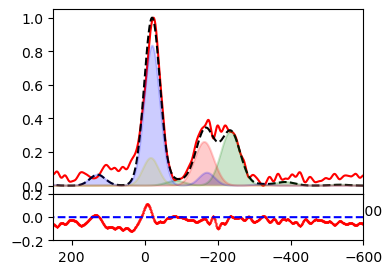

In [11]:
from matplotlib import gridspec
# use simulated simpson files to reconstruct the experimental spectrum
df1=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test1321.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df2=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test1322.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df3=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test1323.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df4=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSe408/CdSe408_test1324.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')

df1.real=df1.real-df1.real.min()  #baseline correction
df1.real=df1.real/df1.real.max()  #normalization

df2.real=df2.real-df2.real.min()  #baseline correction
df2.real=df2.real/df2.real.max()  #normalization

df3.real=df3.real-df3.real.min()  #baseline correction
df3.real=df3.real/df3.real.max()  #normalization

df4.real=df4.real-df4.real.min()  #baseline correction
df4.real=df4.real/df4.real.max()  #normalization

# combine df2 and df3 in a ratio from fitting results, then normalize
# peak_core=df2.real+df3.read8(58811.8/27536.8)
# peak_core=peak_core/peak_core.max()
#ratio=58811.8/(27536.8+58811.8)

#8kmas data
data2=(data2-data2.min())
data2=data2/data2.max() #normalized experimental data

#scale=[data3[uc(-236,'ppm')],data3[uc(-21.7,'ppm')]*(1-ratio), data3[uc(-21.7,'ppm')]*ratio,data3[uc(-165.8,'ppm')]]
#-236.019	-18.197	-21.975	-164.348
scale=np.array([4731.3,2422.3,12273.6,3831.1])

scale=scale/max(scale)
scale=scale/scale[0]*data2[uc(-236.019,'ppm')]


SW =125000
ref_ppm = -193.76087992447444
NP=2048
nuclus_freq= udic[0]['obs']
span_ppm = SW/nuclus_freq
start_x= ref_ppm-span_ppm/2
end_x= ref_ppm + span_ppm/2

#synthesize t


syn_spec=np.array(df4.real*scale[3]+df1.real*scale[0]+df3.real*scale[2]+df2.real*scale[1]) # combine all components

diff = syn_spec/syn_spec.max()-np.array(data2[::-1])

x_axis =np.linspace(start_x, end_x, num= NP, endpoint=True)

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.25] )
ax1 = fig.add_subplot(gs[0])
ax2  =fig.add_subplot(gs[1])
gs.update(hspace=0)


ax1.plot(ppm, data2, "r-")
ax1.plot(x_axis, syn_spec/syn_spec.max(), 'k--')

ax2.plot(x_axis,diff, 'ro', markersize=0.4 )
ax2.plot(x_axis,np.zeros_like(x_axis), 'b--')
#diff = syn_spec-np.array(data2[::-1])
# peak 1
ax1.plot(x_axis,df1.real*scale[0], "g",alpha=0.2)
ax1.fill_between(x_axis, (df1.real*scale[0]).min(), df1.real*scale[0], facecolor="green", alpha=0.2)

# peak core
ax1.plot(x_axis,df2.real*scale[1], "y",alpha=0.2)
ax1.fill_between(x_axis, (df2.real*scale[1]).min(), df2.real*scale[1], facecolor="yellow", alpha=0.2)

# peak 3
ax1.plot(x_axis,df3.real*scale[2], "b",alpha=0.2)
ax1.fill_between(x_axis, (df3.real*scale[2]).min(), df3.real*scale[2], facecolor="blue", alpha=0.2)

# peak 4
ax1.plot(x_axis,df4.real*scale[3], "r",alpha=0.2)
ax1.fill_between(x_axis, (df4.real*scale[3]).min(), df4.real*scale[3], facecolor="red", alpha=0.2)

ax1.set_xlim([250,-600])
ax2.set_xlim([250,-600])
ax2.set_ylim([-0.2,0.2])

#ax1.set_xlim([50,-60])

#ax2.set_xlim([50,-60])

fig.savefig('QD408_CdDP_13KMASP_fitting.pdf')

In [ ]:
# data_dict = {'ppm': x_axis, 'exp':data2, 'syn_spec': syn_spec, 'green':df1.real, 'yellow':df2.real, 'blue': df3.real, 'red':df4.real, 'diff': diff}
# df = pd.DataFrame(data_dict)
# df.to_excel('QD408_CdDP_13KMASP_fitting.xlsx', index=False)

In [109]:
import numpy as np

def calculate_rms(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Input arrays must have the same shape")
    
    squared_diff = (array1 - array2)**2
    mean_squared_diff = np.mean(squared_diff)
    rms = np.sqrt(mean_squared_diff)
    return rms

# Example usage
array1 = syn_spec
array2 = np.array(data2[::-1])

rms_value = calculate_rms(array1, array2)
print(f"Root Mean Square (RMS): {rms_value:.2f}")

Root Mean Square (RMS): 0.04
